### This notebook is focused on finding the distribution of halo masses and generating the IN and OUT classes for the mass bound m_c = 1600 particles


### It can be generalized for any m_c > 1600 particles


In [1]:
import pandas as pd
#importing the particles which are in a halo with mass more than 1600 particle
df = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\IN_Halo.csv', skiprows = 9)
print(df)

         particleId       subhaloId     np  redshift
0                12  63000200000653   3194       0.0
1                44  63000200000653   3194       0.0
2                45  63000200000653   3194       0.0
3                46  63000200000653   3194       0.0
4                51  63000200000653   3194       0.0
...             ...             ...    ...       ...
5578115    19682988  63000100000091  25323       0.0
5578116    19682991  63000100000091  25323       0.0
5578117    19682993  63000100000091  25323       0.0
5578118    19682999  63000100000091  25323       0.0
5578119    19683000  63000100000091  25323       0.0

[5578120 rows x 4 columns]


In [4]:
import numpy as np
df = np.array(df)
particleID = df[:,0]
halo = df[:,1:3:1]
print(len(particleID))
print(halo)

5578120
[[6.30002e+13 3.19400e+03]
 [6.30002e+13 3.19400e+03]
 [6.30002e+13 3.19400e+03]
 ...
 [6.30001e+13 2.53230e+04]
 [6.30001e+13 2.53230e+04]
 [6.30001e+13 2.53230e+04]]


In [3]:
#finding all the IDs and mass of halos bigger than 1600 particles
halo = np.unique(halo , axis=0)
print(halo)
#number of such halos:
num_halo = len(halo)
print(num_halo)

[[6.30000e+13 5.19840e+04]
 [6.30000e+13 2.53500e+03]
 [6.30000e+13 4.02770e+04]
 ...
 [6.30007e+13 1.72900e+03]
 [6.30007e+13 1.60400e+03]
 [6.30007e+13 1.65600e+03]]
706


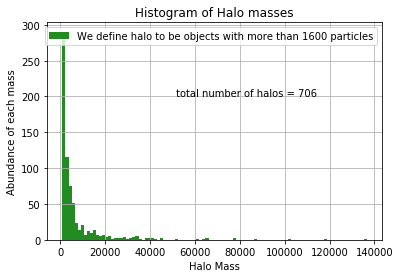

706


In [6]:
#plotting the histogram of halo mass
import matplotlib.pyplot as plt

plt.hist(halo[:,1], bins=100, align='left', color= 'forestgreen', label='We define halo to be objects with more than 1600 particles')

plt.title('Histogram of Halo masses')
plt.xlabel('Halo Mass')
plt.ylabel('Abundance of each mass')
plt.text(50000, 200, ' total number of halos = {}'.format(num_halo))
plt.grid(True)
plt.legend()
plt.savefig('Histogram_of_halo_masses')
plt.show()
print(len(halo[:,1]))

In [8]:
#Importing the data of particles in first snap number z = 127
particles = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\Snap0.csv', skiprows = 14)
print(particles)

          snapnum  phkey         x          y          z         vx  \
0               0      0  0.079177   0.003392   0.416711   6.259036   
1               0      0  0.289189   0.130278   0.456327   7.491590   
2               0      0  0.262699   0.197281   0.224564  32.359110   
3               0      0  0.240575   0.396040   0.038927  67.365524   
4               0      0  0.408888   0.367119   0.182086 -14.317771   
...           ...    ...       ...        ...        ...        ...   
19682995        0      0  0.285719   0.102112   0.024742  36.839947   
19682996        0  28086  0.338755  62.488060  62.102010  21.432320   
19682997        0  32767  0.396658   0.143351  62.302100  30.167624   
19682998        0  32767  0.155790   0.036591  62.291122  68.368500   
19682999        0      0  0.052702   0.014002   0.020630  72.956330   

                 vy          vz        id  
0        -202.86237   43.663280         1  
1        -184.12308   35.697285         2  
2        -205.8

In [9]:
#we want to make a column, In_Halo which saves the information about particles in z=127,in a way that shows if this particle is in a halo at z=0 or not
# 0 for OUT halo
# 1 for IN halo

particles['In_halo'] = particles.id.isin(particleID).astype(int)
print (particles)
print( len(particles[particles['In_halo'] == 1]))

          snapnum  phkey         x          y          z         vx  \
0               0      0  0.079177   0.003392   0.416711   6.259036   
1               0      0  0.289189   0.130278   0.456327   7.491590   
2               0      0  0.262699   0.197281   0.224564  32.359110   
3               0      0  0.240575   0.396040   0.038927  67.365524   
4               0      0  0.408888   0.367119   0.182086 -14.317771   
...           ...    ...       ...        ...        ...        ...   
19682995        0      0  0.285719   0.102112   0.024742  36.839947   
19682996        0  28086  0.338755  62.488060  62.102010  21.432320   
19682997        0  32767  0.396658   0.143351  62.302100  30.167624   
19682998        0  32767  0.155790   0.036591  62.291122  68.368500   
19682999        0      0  0.052702   0.014002   0.020630  72.956330   

                 vy          vz        id  In_halo  
0        -202.86237   43.663280         1        0  
1        -184.12308   35.697285         2

In [12]:
particles.to_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\particles_information.csv' , sep = ',' , encoding='utf-8', index=False)
print('Data made')

Data made


In [14]:
len(particles)

19683000